In [593]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [594]:
# Busca os dados em um csv
historico_lutas = pd.read_csv(r"C:\Users\Rafael\Desktop\MBA\TCC\BJJ\bjj_dado_tratado.csv", encoding='latin-1')

In [595]:
# Mostrar todas as colunas do DataFrame
pd.set_option("display.max.columns", None)

## Estatística Descritiva

In [596]:
# Estatísticas descritivas para categoria
print("\nEstatísticas descritivas de Categoria:")
desc_statistics = historico_lutas[['golpe','tipo_golpe','categoria','genero']].describe()
desc_statistics 


Estatísticas descritivas de Categoria:


,golpe,tipo_golpe,categoria,genero
count,402,402,402,402
unique,33,7,10,2
top,Choke From The Back,Choke (Kimono),Absolute Division,Male
freq,110,158,79,308


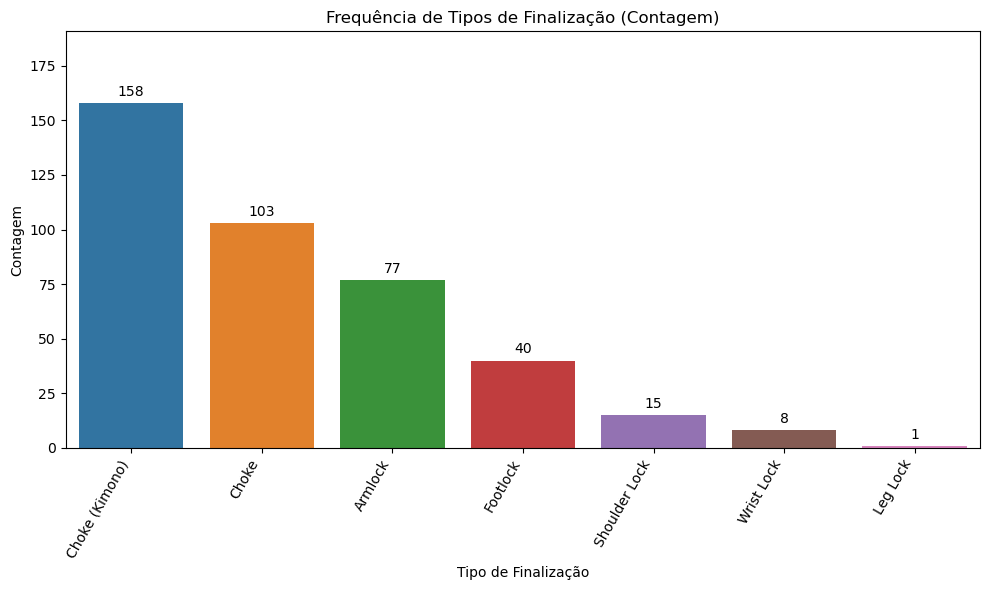

In [597]:
# Visualização: Gráfico de barras para finalizações

ordem_categorias = historico_lutas['tipo_golpe'].value_counts().index

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=historico_lutas, x='tipo_golpe',
                   order=ordem_categorias) # ordem
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Configurações Finais do Gráfico
plt.title('Frequência de Tipos de Finalização (Contagem)') 
plt.xlabel("Tipo de Finalização") 
plt.ylabel("Contagem")   
plt.xticks(rotation=60, ha='right') 
plt.ylim(top=ax.get_ylim()[1] * 1.15) 
plt.tight_layout() 
plt.show()

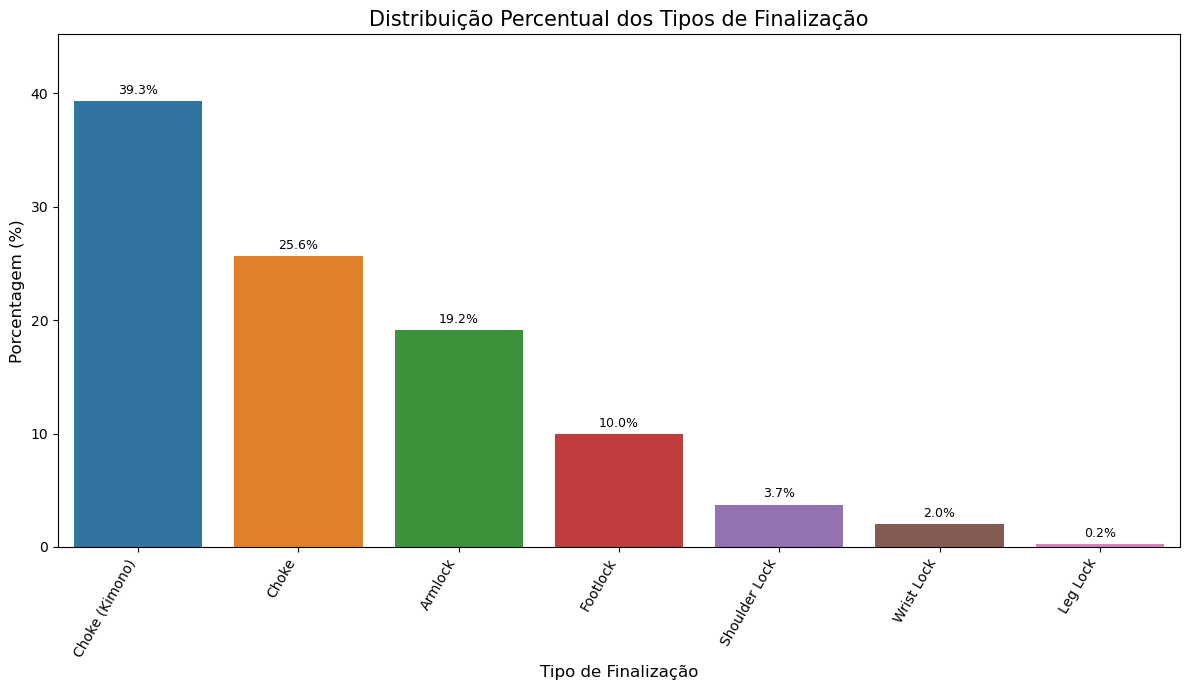

In [598]:
# Distribuição Percentual dos Tipos de Finalização

# Calcular Contagens (já ordenadas por padrão)
tipo_golpe_counts = historico_lutas['tipo_golpe'].value_counts()

# Calcular Porcentagens
total_finalizacoes = len(historico_lutas) 
tipo_golpe_percentages = (tipo_golpe_counts / total_finalizacoes) * 100

# Converte a Series de porcentagens em DataFrame e renomeia colunas
df_plot_perc = tipo_golpe_percentages.reset_index()
df_plot_perc.columns = ['tipo_golpe', 'porcentagem']

# Plotar com sns.barplot
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=df_plot_perc, x='tipo_golpe', y='porcentagem',#palette='Blues_r'
                 ) 
# Ajusta Labels das Barras para mostrar porcentagens
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3, fontsize=9)

# Configurações Finais do Gráfico
plt.title('Distribuição Percentual dos Tipos de Finalização', fontsize=15)
plt.xlabel("Tipo de Finalização", fontsize=12)
plt.ylabel("Porcentagem (%)", fontsize=12) 
plt.xticks(rotation=60, ha='right')

# Pega o valor máximo da porcentagem e adiciona uma margem (15% do máximo)
max_perc = df_plot_perc['porcentagem'].max()
plt.ylim(top=max_perc * 1.15)
plt.tight_layout() 
plt.show()

## Tabelas de Contingência

In [599]:
# Entre tipo de golpe e categoria de peso (Contagem)
tbl_cont_golpe_categoria = pd.crosstab(historico_lutas['categoria'], historico_lutas['tipo_golpe'])
tbl_cont_golpe_categoria

tipo_golpe,Armlock,Choke,Choke (Kimono),Footlock,Leg Lock,Shoulder Lock,Wrist Lock
categoria,,,,,,,
Absolute Division,11,19,33,10,0,3,3
Featherweight,6,13,10,4,0,2,1
Heavyweight,10,5,15,2,0,2,1
Light Featherweight,7,9,14,2,0,0,0
Lightweight,6,10,10,4,0,1,0
Medium Heavyweight,7,16,7,3,1,0,0
Middleweight,5,8,14,4,0,2,0
Rooster Weight,5,2,12,5,0,0,0
Super Heavyweight,10,12,21,3,0,2,1


In [600]:
# Entre tipo de golpe e genero (Contagem)
tbl_cont_golpe_genero = pd.crosstab(historico_lutas['genero'], historico_lutas['tipo_golpe'])
tbl_cont_golpe_genero

tipo_golpe,Armlock,Choke,Choke (Kimono),Footlock,Leg Lock,Shoulder Lock,Wrist Lock
genero,,,,,,,
Female,19,22,34,11,1,7,0
Male,58,81,124,29,0,8,8


In [601]:
# Entre tipo de golpe e categoria de peso (em Porcentagem)
tbl_cont_golpe_categoria_pc = pd.crosstab(historico_lutas['categoria'], historico_lutas['tipo_golpe'], normalize='columns') * 100

# Print tabela formatada
tbl_cont_golpe_categoria_pc_formatada = tbl_cont_golpe_categoria_pc.map(lambda x: f'{x:.1f}%' if pd.notnull(x) else '-')
tbl_cont_golpe_categoria_pc_formatada

tipo_golpe,Armlock,Choke,Choke (Kimono),Footlock,Leg Lock,Shoulder Lock,Wrist Lock
categoria,,,,,,,
Absolute Division,14.3%,18.4%,20.9%,25.0%,0.0%,20.0%,37.5%
Featherweight,7.8%,12.6%,6.3%,10.0%,0.0%,13.3%,12.5%
Heavyweight,13.0%,4.9%,9.5%,5.0%,0.0%,13.3%,12.5%
Light Featherweight,9.1%,8.7%,8.9%,5.0%,0.0%,0.0%,0.0%
Lightweight,7.8%,9.7%,6.3%,10.0%,0.0%,6.7%,0.0%
Medium Heavyweight,9.1%,15.5%,4.4%,7.5%,100.0%,0.0%,0.0%
Middleweight,6.5%,7.8%,8.9%,10.0%,0.0%,13.3%,0.0%
Rooster Weight,6.5%,1.9%,7.6%,12.5%,0.0%,0.0%,0.0%
Super Heavyweight,13.0%,11.7%,13.3%,7.5%,0.0%,13.3%,12.5%


In [602]:
# Entre tipo de golpe e genero (em Porcentagem)
tbl_cont_golpe_genero_pc = pd.crosstab(historico_lutas['genero'], historico_lutas['tipo_golpe'], normalize='index') * 100

# Print tabela formatada
tbl_cont_golpe_genero_formatada = tbl_cont_golpe_genero_pc.map(lambda x: f'{x:.1f}%' if pd.notnull(x) else '-')
tbl_cont_golpe_genero_formatada

tipo_golpe,Armlock,Choke,Choke (Kimono),Footlock,Leg Lock,Shoulder Lock,Wrist Lock
genero,,,,,,,
Female,20.2%,23.4%,36.2%,11.7%,1.1%,7.4%,0.0%
Male,18.8%,26.3%,40.3%,9.4%,0.0%,2.6%,2.6%


# Testes Qui-quadrado
Avaliando:<br> 
Categoria de Peso x Tipo de Golpe<br>
Categoria de Peso x Genero

In [603]:
# Teste Qui-quadrado para associação entre categoria e finalização

chi2, p, dof, expected = chi2_contingency(tbl_cont_golpe_categoria)

n = tbl_cont_golpe_categoria.sum().sum() # Total de observações
min_dim = min(tbl_cont_golpe_categoria.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"\nTeste Qui-quadrado (Categoria vs. Finalização):")
print(f"  Qui-quadrado: {chi2:.2f}")
print(f"  p-valor: {p:.4f}")
print(f"  Graus de Liberdade: {dof}")
print(f"  V de Cramér: {cramers_v:.4f}")
#print("Frequências esperadas:\n", expected)


Teste Qui-quadrado (Categoria vs. Finalização):
  Qui-quadrado: 52.02
  p-valor: 0.5511
  Graus de Liberdade: 54
  V de Cramér: 0.1469


In [604]:
# Teste Qui-quadrado para associação entre genero e finalização

chi2, p, dof, expected = chi2_contingency(tbl_cont_golpe_genero)

n = tbl_cont_golpe_genero.sum().sum() # Total de observações
min_dim = min(tbl_cont_golpe_genero.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Teste Qui-quadrado (Genero vs. Finalização):")
print(f"  Qui-quadrado: {chi2:.2f}")
print(f"  p-valor: {p:.4f}")
print(f"  Graus de Liberdade: {dof}")
print(f"  V de Cramér: {cramers_v:.4f}")
#print("Frequências esperadas:\n", expected)

Teste Qui-quadrado (Genero vs. Finalização):
  Qui-quadrado: 11.25
  p-valor: 0.0810
  Graus de Liberdade: 6
  V de Cramér: 0.1673



Teste Qui-quadrado (Categoria vs. Tipo de Finalização):
  Qui-quadrado: 52.02
  p-valor: 0.5511
  Graus de Liberdade: 54
  V de Cramér: 0.1469


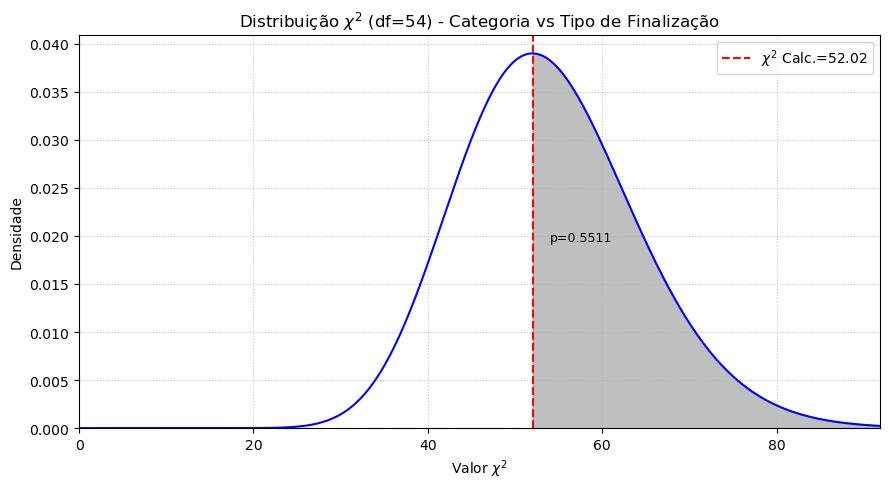

In [605]:
# Teste Qui-quadrado (Categoria vs. Tipo de Finalização)
from scipy.stats import chi2, chi2_contingency

stat_chi2, p, dof, expected = chi2_contingency(tbl_cont_golpe_categoria)

n = tbl_cont_golpe_categoria.sum().sum()
min_dim = min(tbl_cont_golpe_categoria.shape) - 1

# Verificação para evitar erro no np.sqrt ou divisão por zero
cramers_v = np.sqrt(stat_chi2 / (n * min_dim)) if n > 0 and min_dim > 0 and stat_chi2 >= 0 else np.nan

# Resultados
print(f"\nTeste Qui-quadrado (Categoria vs. Tipo de Finalização):")
print(f"  Qui-quadrado: {stat_chi2:.2f}")
print(f"  p-valor: {p:.4f}")
print(f"  Graus de Liberdade: {dof}")
print(f"  V de Cramér: {cramers_v:.4f}")

# Plot 
x_min = 0
x_max_calc = stat_chi2 * 1.5
x_max_ppf = chi2.ppf(0.999, dof) if dof > 0 else x_max_calc
x_max = max(x_max_calc, x_max_ppf if np.isfinite(x_max_ppf) else x_max_calc)

if not np.isfinite(x_max) or x_max <= x_min:
     x_max = stat_chi2 + 10 * np.sqrt(max(dof, 1)) # Usa max(dof,1) p/ evitar sqrt(0)
     if x_max <= x_min : x_max = x_min + 10

x = np.linspace(x_min, x_max, 300)
pdf_y = chi2.pdf(x, dof) if dof > 0 else np.zeros_like(x)

plt.figure(figsize=(9, 5))
plt.plot(x, pdf_y, color='blue')

x_shade = np.linspace(stat_chi2, x_max, 100)
pdf_shade = chi2.pdf(x_shade, dof) if dof > 0 else np.zeros_like(x_shade)
plt.fill_between(x_shade, pdf_shade, where=pdf_shade>=0, color='grey', alpha=0.5)

plt.axvline(stat_chi2, color='red', linestyle='--', label=f'$\chi^2$ Calc.={stat_chi2:.2f}')

text_x = stat_chi2 + (x_max - stat_chi2) * 0.05
text_y_pdf = chi2.pdf(text_x, dof) if dof > 0 else 0
text_y_plot = max(pdf_y) * 0.1 if max(pdf_y) > 0 else 0.05
if text_y_plot < text_y_pdf * 0.5: text_y_plot = text_y_pdf * 0.5
plt.text(text_x, text_y_plot, f'p={p:.4f}', fontsize=9, va='bottom')

plt.title(f'Distribuição $\chi^2$ (df={dof}) - Categoria vs Tipo de Finalização')
plt.xlabel('Valor $\chi^2$')
plt.ylabel('Densidade')
plt.legend(loc='upper right')
plt.grid(True, linestyle=':', alpha=0.7)
plt.ylim(bottom=0)
plt.xlim(left=0, right=x_max)
plt.tight_layout()
plt.show()


Teste Qui-quadrado (Gênero vs. Tipo de Finalização):
  Qui-quadrado: 11.25
  p-valor: 0.0810
  Graus de Liberdade: 6
  V de Cramér: 0.1673


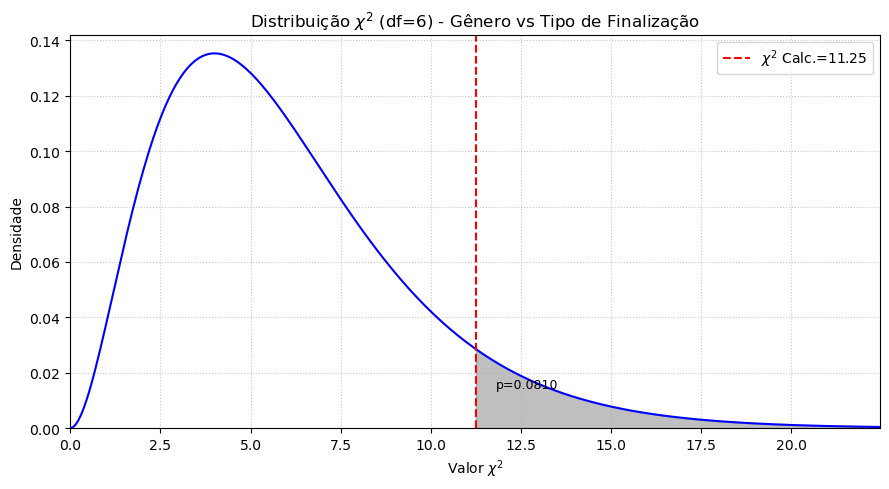

In [606]:
# Teste Qui-quadrado (Gênero vs. Tipo de Finalização)
from scipy.stats import chi2, chi2_contingency

stat_chi2, p, dof, expected = chi2_contingency(tbl_cont_golpe_genero)

n = tbl_cont_golpe_genero.sum().sum()
min_dim = min(tbl_cont_golpe_genero.shape) - 1

# Verificação para evitar erro no np.sqrt ou divisão por zero
cramers_v = np.sqrt(stat_chi2 / (n * min_dim)) if n > 0 and min_dim > 0 and stat_chi2 >= 0 else np.nan

# Resultados
print(f"\nTeste Qui-quadrado (Gênero vs. Tipo de Finalização):")
print(f"  Qui-quadrado: {stat_chi2:.2f}")
print(f"  p-valor: {p:.4f}")
print(f"  Graus de Liberdade: {dof}")
print(f"  V de Cramér: {cramers_v:.4f}")

# Plot 
x_min = 0
x_max_calc = stat_chi2 * 1.5
x_max_ppf = chi2.ppf(0.999, dof) if dof > 0 else x_max_calc
x_max = max(x_max_calc, x_max_ppf if np.isfinite(x_max_ppf) else x_max_calc)

if not np.isfinite(x_max) or x_max <= x_min:
     x_max = stat_chi2 + 10 * np.sqrt(max(dof, 1)) # Usa max(dof,1) p/ evitar sqrt(0)
     if x_max <= x_min : x_max = x_min + 10

x = np.linspace(x_min, x_max, 300)
pdf_y = chi2.pdf(x, dof) if dof > 0 else np.zeros_like(x)

plt.figure(figsize=(9, 5))
plt.plot(x, pdf_y, color='blue')

x_shade = np.linspace(stat_chi2, x_max, 100)
pdf_shade = chi2.pdf(x_shade, dof) if dof > 0 else np.zeros_like(x_shade)
plt.fill_between(x_shade, pdf_shade, where=pdf_shade>=0, color='grey', alpha=0.5)

plt.axvline(stat_chi2, color='red', linestyle='--', label=f'$\chi^2$ Calc.={stat_chi2:.2f}')

text_x = stat_chi2 + (x_max - stat_chi2) * 0.05
text_y_pdf = chi2.pdf(text_x, dof) if dof > 0 else 0
text_y_plot = max(pdf_y) * 0.1 if max(pdf_y) > 0 else 0.05
if text_y_plot < text_y_pdf * 0.5: text_y_plot = text_y_pdf * 0.5
plt.text(text_x, text_y_plot, f'p={p:.4f}', fontsize=9, va='bottom')

plt.title(f'Distribuição $\chi^2$ (df={dof}) - Gênero vs Tipo de Finalização')
plt.xlabel('Valor $\chi^2$')
plt.ylabel('Densidade')
plt.legend(loc='upper right')
plt.grid(True, linestyle=':', alpha=0.7)
plt.ylim(bottom=0)
plt.xlim(left=0, right=x_max)
plt.tight_layout()
plt.show()

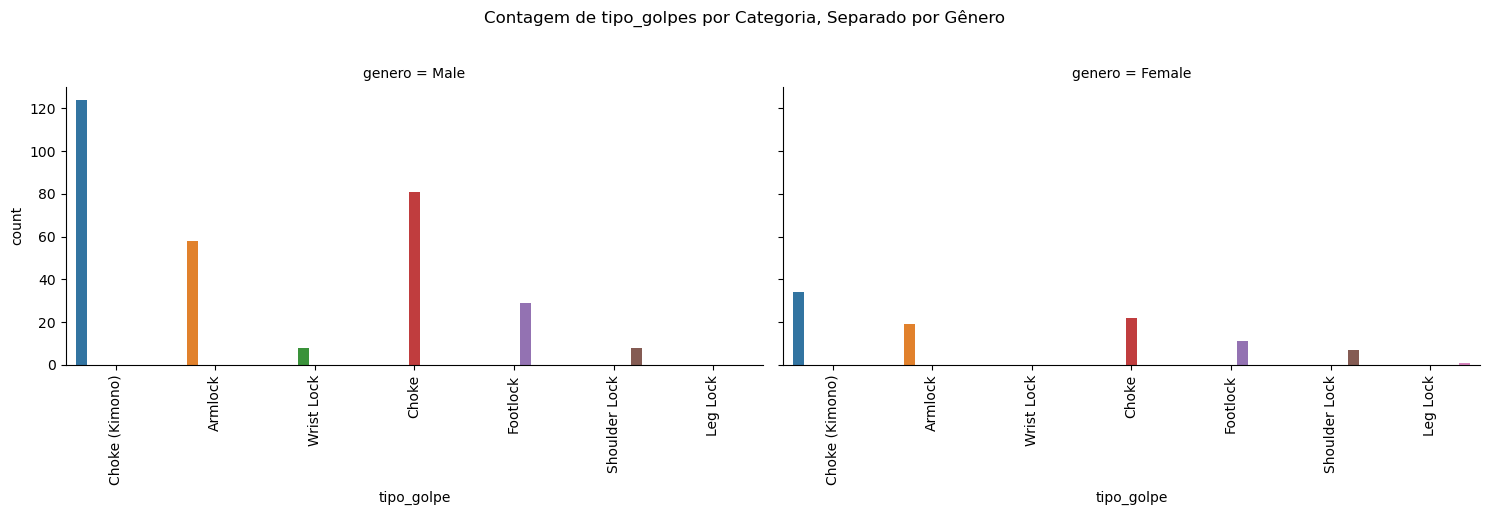

In [607]:

# Criar tabela de contagem longa para o FacetGrid/catplot
# (Pode precisar agrupar e calcular proporções antes)
# Exemplo conceitual: mostrar contagem de tipo_golpes por categoria, facetado por genero
g = sns.catplot(data=historico_lutas, x='tipo_golpe', hue='tipo_golpe', col='genero', kind='count',
                height=5, aspect=1.5, legend_out=True) # Ajuste os parâmetros conforme necessário
g.set_xticklabels(rotation=90)
g.fig.suptitle('Contagem de tipo_golpes por Categoria, Separado por Gênero', y=1.02)
plt.tight_layout()
plt.show()

# Mapa de Calor
Frequência de Tipos de Finalização por Categoria



Ordem dos Tipos de Golpe (Eixo Y) por Contagem Total:
['Choke (Kimono)', 'Choke', 'Armlock', 'Footlock', 'Shoulder Lock', 'Wrist Lock', 'Leg Lock']


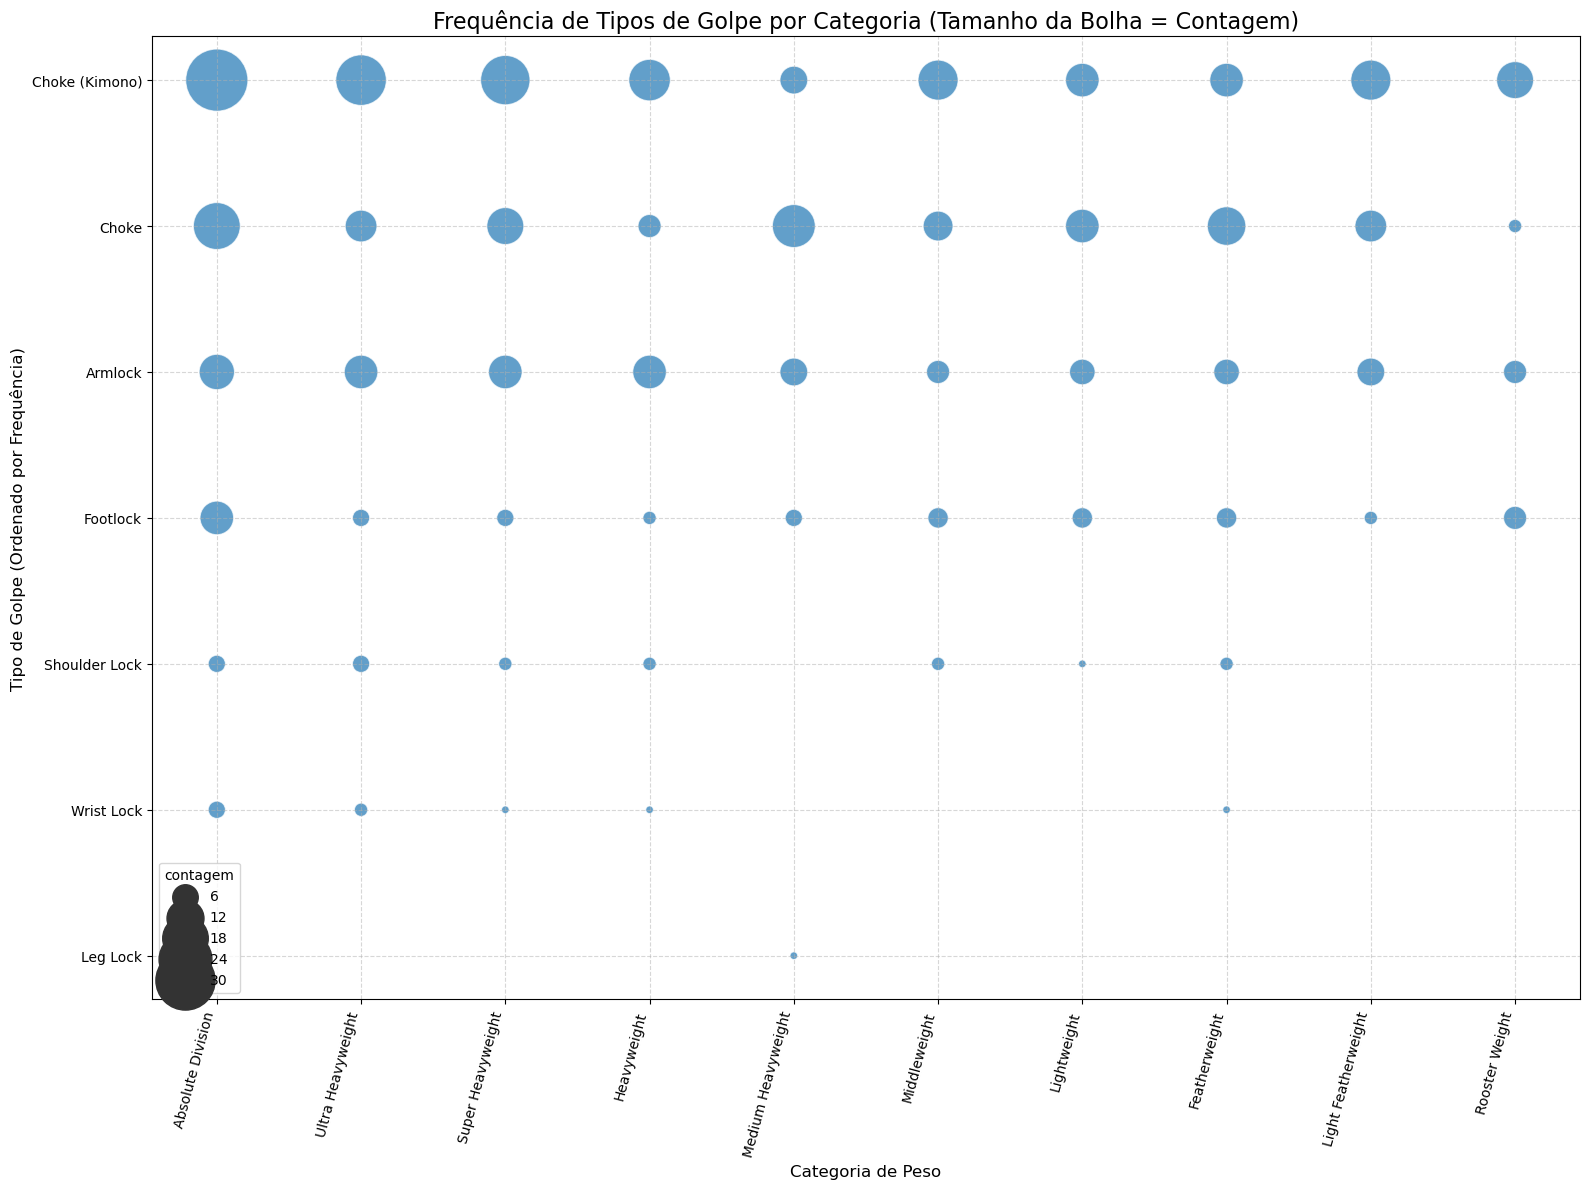

In [608]:
# Agrupa por categoria e tipo_golpe e conta as ocorrências
contagens = historico_lutas.groupby(['categoria', 'tipo_golpe']).size()

# Prepara os Dados para Plotagem
historico_lutas_plot = contagens.reset_index(name='contagem')

# Ordenação do Eixo Y (Tipo de Golpe - por frequência) 
tipo_golpe_counts = historico_lutas_plot.groupby('tipo_golpe')['contagem'].sum().sort_values(ascending=False)
tipo_golpe_order = tipo_golpe_counts.index.tolist()
print("\nOrdem dos Tipos de Golpe (Eixo Y) por Contagem Total:")
print(tipo_golpe_order)
historico_lutas_plot['tipo_golpe'] = pd.Categorical(historico_lutas_plot['tipo_golpe'],
                                                   categories=tipo_golpe_order,
                                                   ordered=True)

# Ordem desejada das categorias
ordem_categorias_peso = [
    'Absolute Division',
    'Ultra Heavyweight',
    'Super Heavyweight',
    'Heavyweight',
    'Medium Heavyweight',
    'Middleweight',
    'Lightweight',
    'Featherweight',
    'Light Featherweight',
    'Rooster Weight'
]

# Aplica a ordem personalizada à coluna 'categoria'
historico_lutas_plot['categoria'] = pd.Categorical(
    historico_lutas_plot['categoria'],
    categories=ordem_categorias_peso, # Usa a lista definida manualmente
    ordered=True
)

# Plota usando Seaborn Scatterplot
plt.figure(figsize=(16, 12))

bubble_plot = sns.scatterplot(
    data=historico_lutas_plot,
    x='categoria',      # Eixo X agora ordenado manualmente
    y='tipo_golpe',     # Eixo Y ordenado por frequência
    size='contagem',
    sizes=(30, 2000),
    alpha=0.7,
    legend='auto'
)

# Legibilidade do gráfico
plt.title('Frequência de Tipos de Golpe por Categoria (Tamanho da Bolha = Contagem)', fontsize=16)
plt.xlabel('Categoria de Peso', fontsize=12) # Label atualizado
plt.ylabel('Tipo de Golpe (Ordenado por Frequência)', fontsize=12) # Label atualizado
plt.xticks(rotation=75, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

DataFrame reordenado com sucesso.


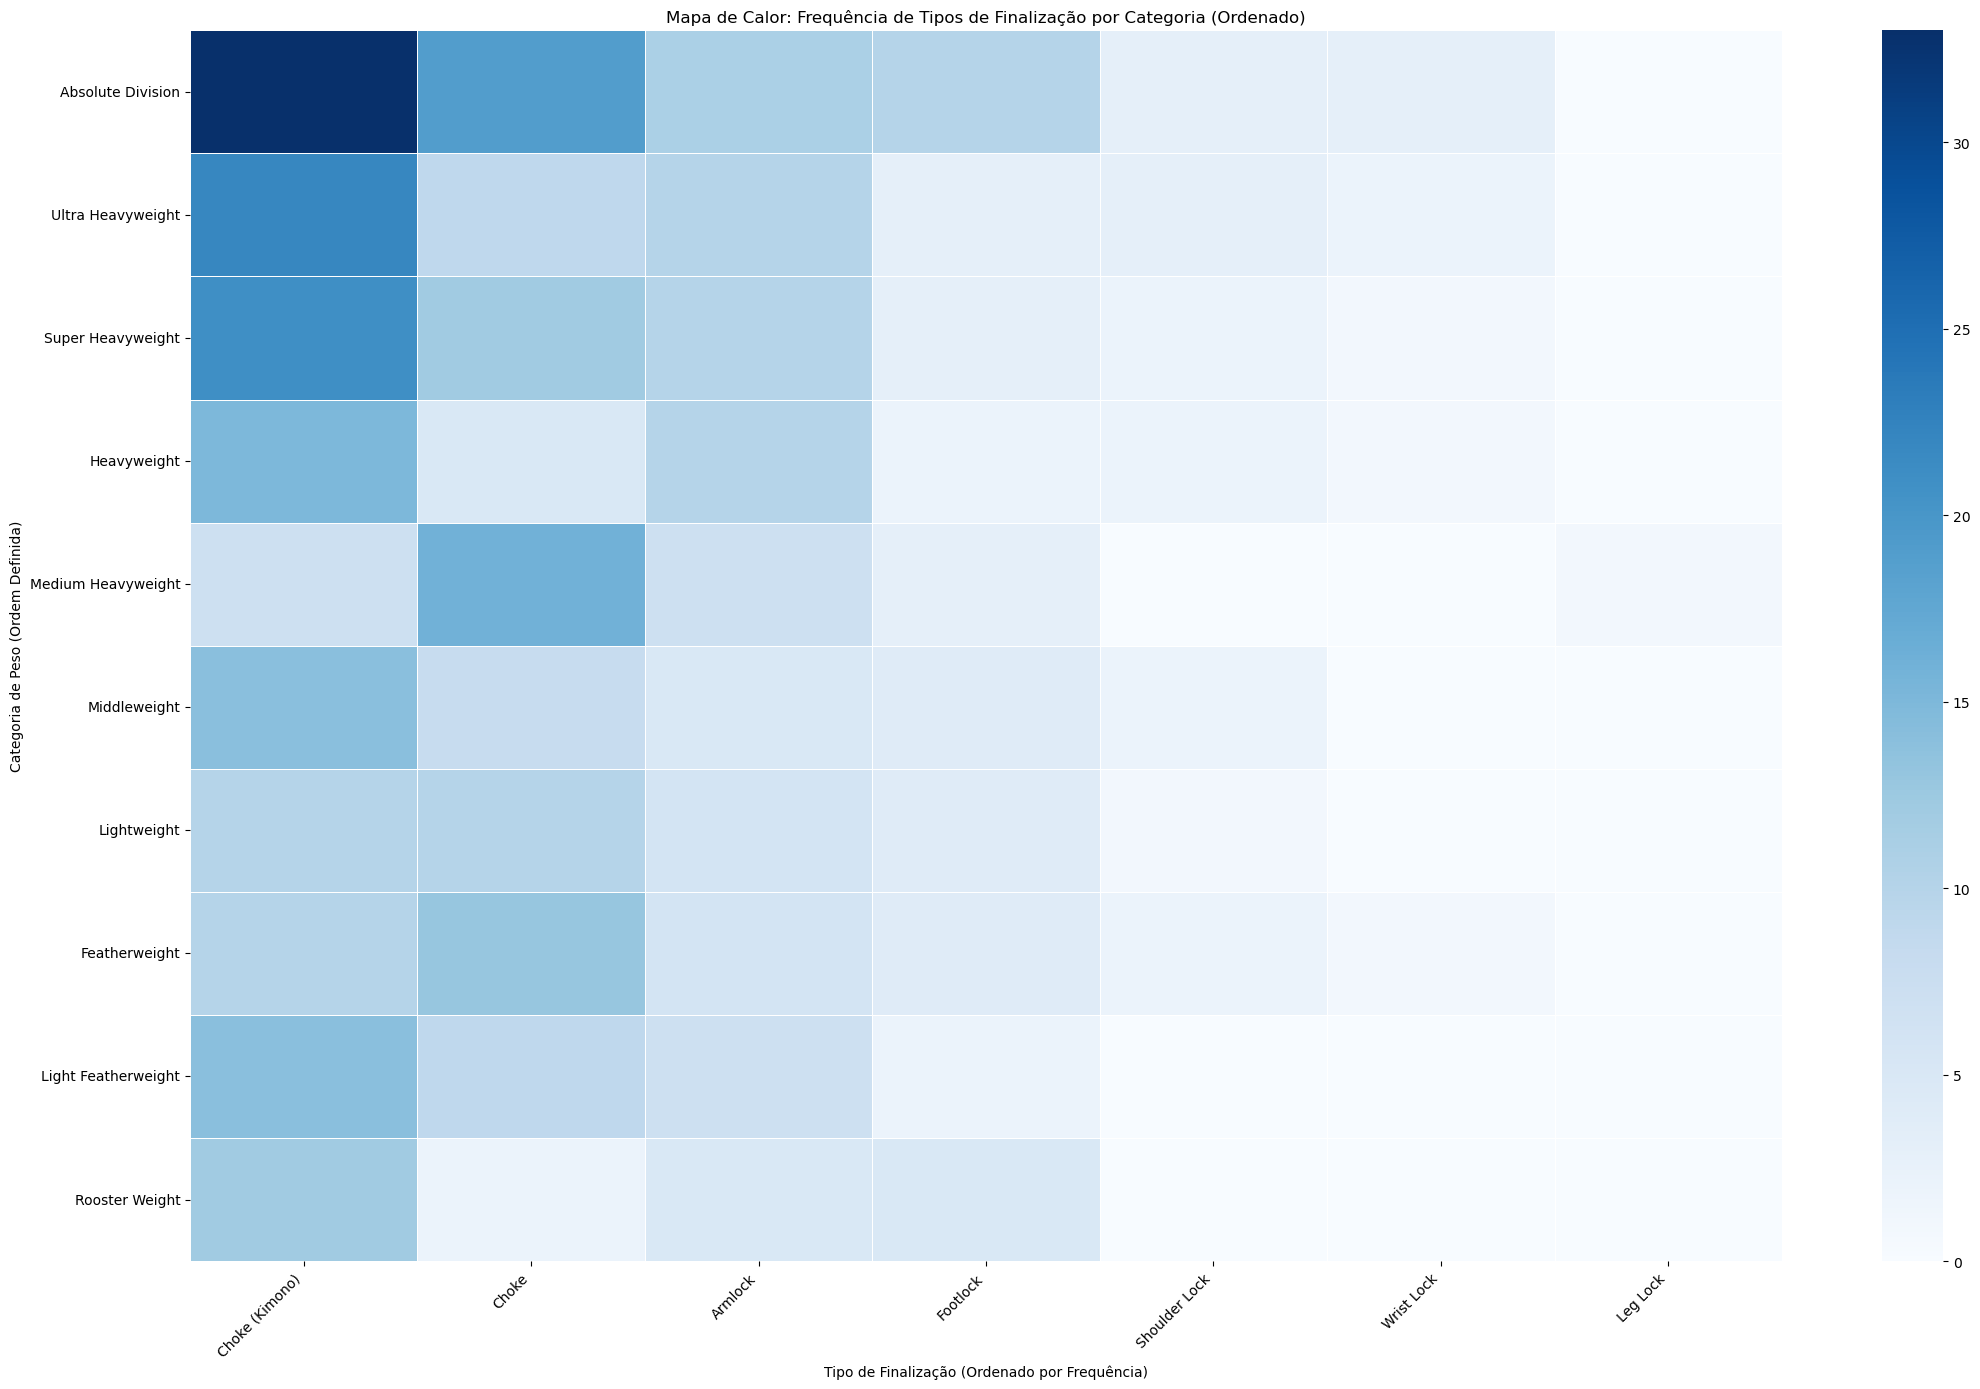

In [613]:
# Heatmap Ordenado: Frequência de Tipos de Finalização por Categoria

# Reordenar o DataFrame
tbl_cont_golpe_categoria_ordenada = tbl_cont_golpe_categoria.reindex(
        index=ordem_categorias_peso,  
        columns=tipo_golpe_order      
    )
print("DataFrame reordenado com sucesso.")

# --- Plotar o Mapa de Calor ---
plt.figure(figsize=(22, 14))

# Usar o DataFrame ordenado (que agora é realmente um DataFrame)
sns.heatmap(tbl_cont_golpe_categoria_ordenada, annot=False, fmt="d", cmap="Blues", linewidths=.5)

# Atualize os títulos e labels se desejar para refletir a ordenação
plt.title('Mapa de Calor: Frequência de Tipos de Finalização por Categoria (Ordenado)')
plt.xlabel('Tipo de Finalização (Ordenado por Frequência)')
plt.ylabel('Categoria de Peso (Ordem Definida)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0) # Mantém os y-ticks horizontais
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()


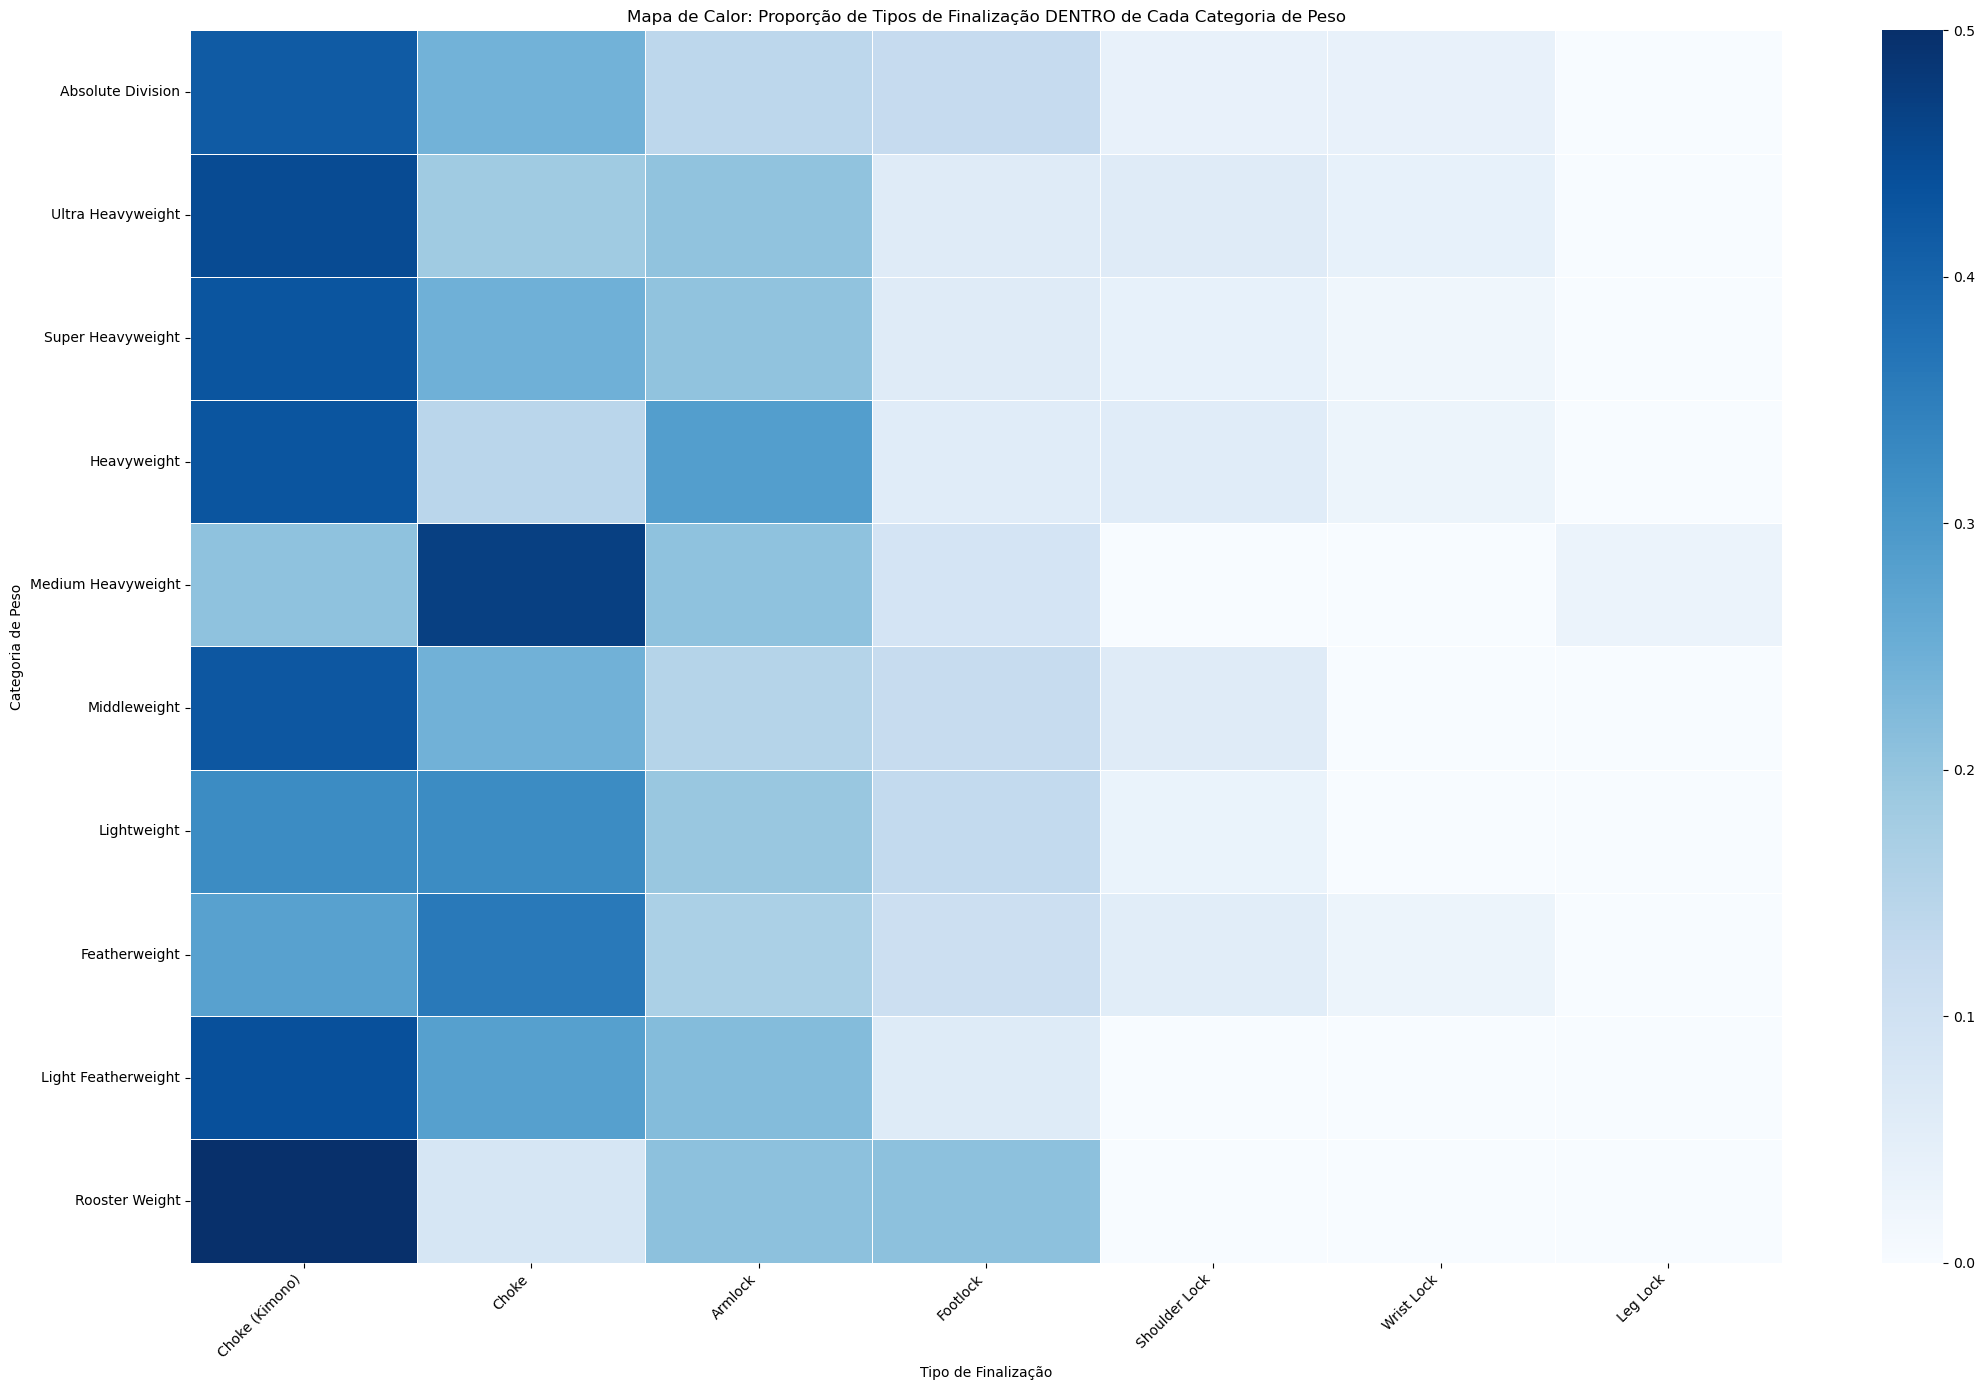

In [ ]:
# Normalização por Linha (por Categoria de Peso) para melhor visualização

# Calcula a soma de cada linha (total de finalizações por categoria)
soma_por_categoria = tbl_cont_golpe_categoria_ordenada.sum(axis=1)

# Divide cada valor na linha pela soma da respectiva linha
tbl_norm_por_categoria = tbl_cont_golpe_categoria_ordenada.div(soma_por_categoria, axis=0)

# Tratar casos onde a soma da linha pode ser zero
tbl_norm_por_categoria = tbl_norm_por_categoria.fillna(0)

# Plotar o Heatmap Normalizado por Linha
plt.figure(figsize=(22, 14))
sns.heatmap(tbl_norm_por_categoria, annot=False, fmt=".2f", cmap="Blues", linewidths=.5)
plt.title('Mapa de Calor: Proporção de Tipos de Finalização DENTRO de Cada Categoria de Peso')
plt.xlabel('Tipo de Finalização')
plt.ylabel('Categoria de Peso')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()